# Data Science Project - Airbnb

## 1 - Business Understanding

Airbnb operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities, being based in San Francisco, California. The company wants to know more about its New York city customers as part of an expansion strategy. It wants to know where they usually stay, for how long, in what room type and how much they are willing to pay to stay in New York city. 


## 2 - Data Understanding

This project consists of analyzing a dataset containing Airbnb records from New York City in the year 2019.

This dataset has been downloaded from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) and contains over 48,000 records containing the following:

- Host ID
- Customer name
- Borough where the customer stayed
- Borough's geo location (latitude and longitude)
- Room type
- Number of nights
- Price per night
- Number of reviews

## 3 - Data Preparation

The data needs some cleansing. So, we are going to open the data, explore it, and do some cleansing so it can be ready to answer the business questions

In [166]:
### Importing Pandas, Matplotlib and Seaborn
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Enabling matplotlib on Jupyter
%matplotlib inline

### Checking Packages version
print('Pandas version: {}'.format(pd.__version__))
print('Matplotlib version: {}'.format(matplotlib.__version__))
print('Seaborn version: {}'.format(sns.__version__))

Pandas version: 1.0.3
Matplotlib version: 2.2.2
Seaborn version: 0.10.1


In [167]:
### Opening file
df = pd.read_csv('C:/Python/AB_NYC_2019.csv')

In [168]:
### Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [169]:
### Seeing first 5 rows
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [170]:
### Do a row count
df.shape

# Answer: 48,895 rows and 16 columns

(48895, 16)

In [171]:
### Checking columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [172]:
### Looking for missing values
df.count().sort_values(ascending=False)

# Obs: Columns with mising values: name, host_name, reviews_per_month and last_review

availability_365                  48895
calculated_host_listings_count    48895
number_of_reviews                 48895
minimum_nights                    48895
price                             48895
room_type                         48895
longitude                         48895
latitude                          48895
neighbourhood                     48895
neighbourhood_group               48895
host_id                           48895
id                                48895
name                              48879
host_name                         48874
reviews_per_month                 38843
last_review                       38843
dtype: int64

In [173]:
### Checking missing columns
df[['name', 'host_name', 'reviews_per_month', 'last_review']]

,name,host_name,reviews_per_month,last_review
0,Clean & quiet apt home by the park,John,0.21,2018-10-19
1,Skylit Midtown Castle,Jennifer,0.38,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,4.64,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,0.10,2018-11-19
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,NaN,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,NaN,NaN


In [174]:
### Replacing missing values

# Categorical columns
for col in ['name', 'host_name', 'last_review']:
    df[col] = df[col].fillna('0')

# Numerical column
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

Obs: We decided to input the mean value for reviews by month because it is the simplest approach.

In [175]:
### Checking unique values
df['reviews_per_month'].unique()

array([2.10000000e-01, 3.80000000e-01, 1.37322143e+00, 4.64000000e+00,
       1.00000000e-01, 5.90000000e-01, 4.00000000e-01, 3.47000000e+00,
       9.90000000e-01, 1.33000000e+00, 4.30000000e-01, 1.50000000e+00,
       1.34000000e+00, 9.10000000e-01, 2.20000000e-01, 1.20000000e+00,
       1.72000000e+00, 2.12000000e+00, 4.44000000e+00, 7.00000000e-02,
       1.09000000e+00, 3.70000000e-01, 6.10000000e-01, 7.30000000e-01,
       1.37000000e+00, 4.90000000e-01, 1.11000000e+00, 2.40000000e-01,
       2.04000000e+00, 1.42000000e+00, 1.65000000e+00, 2.37000000e+00,
       6.60000000e-01, 1.41000000e+00, 1.96000000e+00, 1.81000000e+00,
       2.08000000e+00, 3.90000000e-01, 2.30000000e-01, 6.90000000e-01,
       8.40000000e-01, 2.25000000e+00, 5.20000000e-01, 1.16000000e+00,
       1.01000000e+00, 6.30000000e-01, 7.00000000e-01, 2.82000000e+00,
       9.00000000e-01, 1.70000000e-01, 2.49000000e+00, 1.19000000e+00,
       3.00000000e-01, 1.20000000e-01, 5.70000000e-01, 1.60000000e-01,
      

In [176]:
### Doing a count after replacing missing values
df.count()

id                                48895
name                              48895
host_id                           48895
host_name                         48895
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       48895
reviews_per_month                 48895
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [177]:
### Dropping multiple columns
df = df.drop(['last_review', 'calculated_host_listings_count', 'availability_365'], axis=1)

In [178]:
### Checking how the data is distributed
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000


In [179]:
### Checking distinct values for a column
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [180]:
### Renaming columns
df.columns
df = df.rename(columns = {'neighbourhood_group':'borough'})

In [181]:
### Checking renamed columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'borough', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month'],
      dtype='object')

In [182]:
### Renaming values
df['room_type'].unique()
df['room_type'] = df['room_type'].replace({'Private room':'Private', 'Shared room': 'Shared'})

In [183]:
### Checking renamed values 
df['room_type'].unique()

array(['Private', 'Entire home/apt', 'Shared'], dtype=object)

In [184]:
### Checking the hightest and lowest price
df['price'].max()

10000

In [185]:
### Checking the hightest and lowest price
df['price'].min()

0

## 4 - Data Mining Goals

Now that we are done cleansing the data, we have to answer the following questions:

### 4.1 - Borough and room type analysis
- What is the most visited borough?
- What is the most frequent room type?
- What is the most popular room type by borough?

### 4.2 - Price analysis
- On average, what is the most expensive borough?
- On average, what is the most expensive room type?
- What is the minimum, maximum and average price spend by borough and room type?

### 4.3 - Minimum nights analysis
- What's the mean minimum nights distribution by borough? 
- What's the mean minimum nights distribution by room type?
- What is the minimum, maximum and average number of nights people spend by borough and room type?

## 4.1- Borough and room type analysis

### What is the most visited borough?

In [186]:
### Declaring functions
def percentages(data, col, colour):
    data2 = (data[col].value_counts()/data.shape[0])*100
    data2.plot(kind='bar',color=colour)
    plt.title('Distribution of customers per {}'.format(col))
    plt.show() 
    print(data2)
    
    
def percentages2(data, col1, col2):
    data2 = ((data.groupby([col1, col2])[col2].count()/data.shape[0])*100).sort_values(ascending=False)
    data2.plot(kind='bar')
    plt.title('Distribution of customers per {} and {}'.format(col1, col2))
    plt.show()
    print(data2)
    
    
def mean_value(data, col1, col2):
    data2 = data.groupby(col1)[col2].mean().sort_values(ascending=False)
    data2.plot(kind='bar')
    plt.title('Average {} per {}'.format(col2, col1))
    plt.show()
    print(data2)   
    
    
def aggregations(data, col1, col2, col3):
    data2 = data.groupby([col1, col2])[col3].mean().reset_index()
    sns.barplot(x=col1, y=col3, hue=col2, data=data2)
    plt.show()
    print(df.groupby([col1, col2]).agg({col3: ['min', 'max', 'mean']}))    

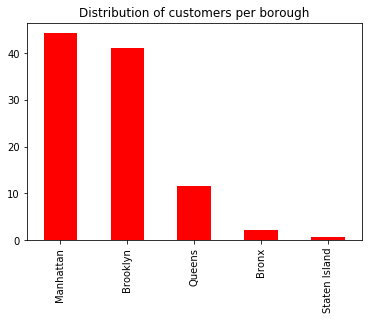

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: borough, dtype: float64


In [187]:
### Calling function
percentages(df, 'borough', 'red')

***Obs:***
No wonder Manhattan is the most visited borough. What is interesting to observe is how Brooklyn closed the gap and how both of them stand out when compared to the remaining boroughs. Besides, we can see that 85% of all customers stay in either Manhattan or Brooklyn.

### What is the most frequent room type?

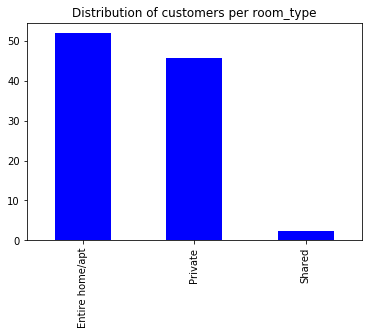

Entire home/apt    51.966459
Private            45.661111
Shared              2.372431
Name: room_type, dtype: float64


In [188]:
### Calling function
percentages(df, 'room_type', 'blue')

***Obs:***
Entire home/apt and Private room are the most frequent room types accounting for over 97% of all rooms. We can tell that Airbnb customers are not into room sharing.

### What is the most popular room type by borough?

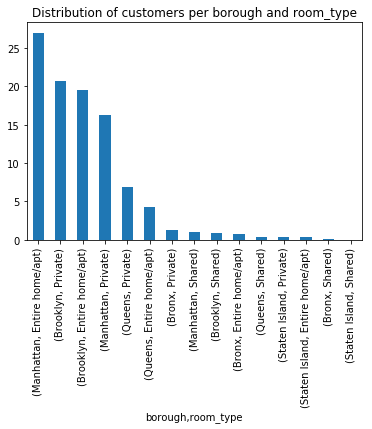

borough        room_type      
Manhattan      Entire home/apt    26.994580
Brooklyn       Private            20.721955
               Entire home/apt    19.550056
Manhattan      Private            16.324778
Queens         Private             6.896411
               Entire home/apt     4.286737
Bronx          Private             1.333470
Manhattan      Shared              0.981695
Brooklyn       Shared              0.844667
Bronx          Entire home/apt     0.775130
Queens         Shared              0.404949
Staten Island  Private             0.384497
               Entire home/apt     0.359955
Bronx          Shared              0.122712
Staten Island  Shared              0.018407
Name: room_type, dtype: float64


In [189]:
### Calling function
percentages2(df, 'borough', 'room_type')

***Obs:***
Private room is the most frequent room type in the Bronx, Brooklyn, Queens and Staten Island. Surprisinly, in Manhattan, Entire home/apt is the most observed room type by a huge margin.

Moreover, we can see that 83.5% of customers stay in the following boroughs/room types

1. Manhattan Entire home/apt: 27%
2. Brooklyn Private room: 20.7%
3. Brooklyn Entire home/apt: 19.5%
4. Manhattan Private room: 16.3%

## 4.2 - Price analysis

### On average, what is the most expensive borough?

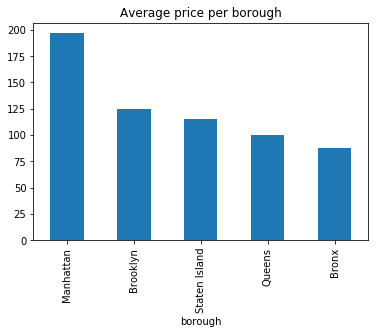

borough
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


In [190]:
### Calling function
mean_value(df, 'borough', 'price')

***Obs:***
Again, no surprise. Manhattan has the highest mean price by a long shot. However, it is interesting to observe the gap between Manhattan and the other boroughs and how close their means are.

### On average, what is the most expensive room type?

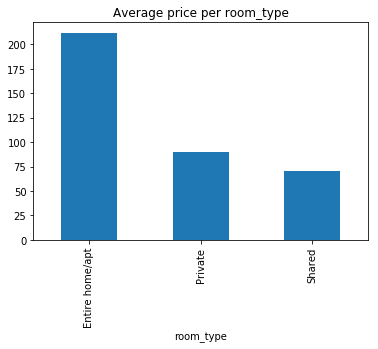

room_type
Entire home/apt    211.794246
Private             89.780973
Shared              70.127586
Name: price, dtype: float64


In [191]:
### Calling function
mean_value(df, 'room_type', 'price')

***Obs:***
Again, no surprise. Entire home/apt has the highest mean price by more than twice the value of a Private room

### What is the minimum, maximum and average price spend by borough and room type? 

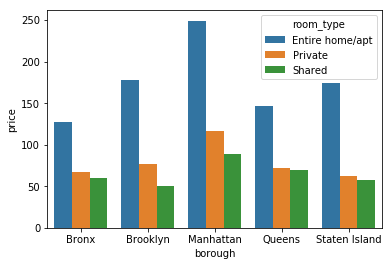

                              price                   
                                min    max        mean
borough       room_type                               
Bronx         Entire home/apt    28   1000  127.506596
              Private             0   2500   66.788344
              Shared             20    800   59.800000
Brooklyn      Entire home/apt     0  10000  178.327545
              Private             0   7500   76.500099
              Shared              0    725   50.527845
Manhattan     Entire home/apt     0  10000  249.239109
              Private            10   9999  116.776622
              Shared             10   1000   88.977083
Queens        Entire home/apt    10   2600  147.050573
              Private            10  10000   71.762456
              Shared             11   1800   69.020202
Staten Island Entire home/apt    48   5000  173.846591
              Private            20    300   62.292553
              Shared             13    150   57.444444


In [192]:
### Calling function
aggregations(df, 'borough', 'room_type', 'price')

***Obs:***
No wonder entire home/apt is the most expensive room type. In addition, private and shared room have similiar prices in the Bronx, Queens and Staten Island. 

What is interesting to observe is that Manhattan and Brooklyn have a similar pattern.

The average price for Entire home/apt is way more expensive than Private and Shared, but the average price of a Private room is not much more expensive than that of a shared room

## 4.3 - Minimum nights analysis

### What's the mean minimum nights distribution by borough?

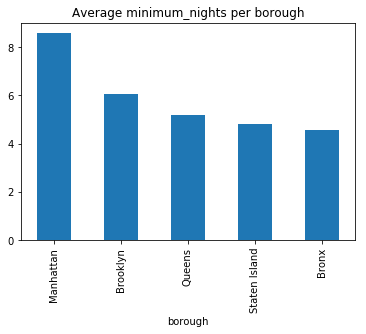

borough
Manhattan        8.579151
Brooklyn         6.056556
Queens           5.181433
Staten Island    4.831099
Bronx            4.560953
Name: minimum_nights, dtype: float64


In [193]:
### Calling function
mean_value(df, 'borough', 'minimum_nights')

***Obs:***
We can see that, apart from Manhattan, the average number of minimum nights is almost equally distributed across the remaining boroughs. Therefore, customers usually stay longer in Manhattan

### What's the mean minimum nights distribution by room type?

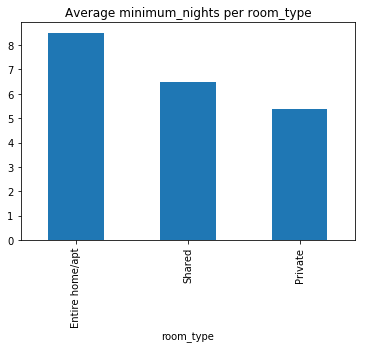

room_type
Entire home/apt    8.506907
Shared             6.475000
Private            5.377900
Name: minimum_nights, dtype: float64


In [194]:
### Calling function
mean_value(df, 'room_type', 'minimum_nights')

***Obs***:
Customers tend to stay longer in an entire home/apt on average. Although the number of shared rooms is way smaller when compared to the other two room types, people tend to stay longer in shared rooms when compared to private rooms.

### What is the minimum, maximum and average number of nights people spend by borough and room type? 

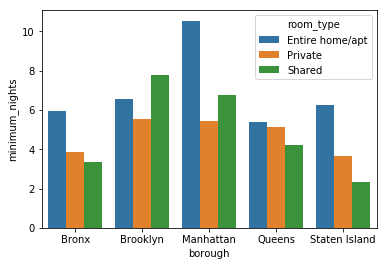

                              minimum_nights                 
                                         min   max       mean
borough       room_type                                      
Bronx         Entire home/apt              1   186   5.957784
              Private                      1   365   3.858896
              Shared                       1    90   3.366667
Brooklyn      Entire home/apt              1   500   6.531332
              Private                      1   999   5.539479
              Shared                       1   100   7.753027
Manhattan     Entire home/apt              1  1250  10.539283
              Private                      1   365   5.446880
              Shared                       1   999   6.766667
Queens        Entire home/apt              1   500   5.369752
              Private                      1   365   5.120107
              Shared                       1    62   4.232323
Staten Island Entire home/apt              1   365   6.238636
        

In [165]:
### Calling function
aggregations(df, 'borough', 'room_type', 'minimum_nights')

***Obs:***
It is interesting to observe that in Manhattan, the most frequent room types is also the one with the highest number of minimum nights. Besides, people who stay in Manhhattan and Brooklyn tend to stay longer when sharing their rooms. The only question is how much more revenue this type of customer can add to Airbnb.

## 5 - Evaluating the Results

<p>The most valuable customers are those who stay in Manhattan, in a entire/home apt and stay on average 10 days in New York city.</p>
<p>Customers are willing to pay more to stay in either Brooklyn or Manhattan when compared to Queen, Bronx and Staten Island. Besides, they don't seem to be very much into room sharing.<p/>

<p>Customers who stay in Manhattan or Brooklyn in shared rooms tend to stay longer when compared to the other boroughs.<p/>

<p>If Airbnb focuses on offering more apartments in Brooklyn and Manhattan, then it is very likely that its revenue will grow.<p/>

Staten Island is not considered a place to stay when visiting New York. Maybe it has potential to grow, maybe not. But, because its average price is similar to Brooklyn's, Airbnb should analyze whether it is possible to expand the number of apartments in that specific borough.

## 6 - Blog Post

Blog post on [Medium](https://paulo-toscano.medium.com/) for a non-technical audience